# MySQL MariaDB

Hardware specifications:

```
System | Supermicro; SYS-F619P2-RTN; v0123456789 (Other)
   Platform | Linux
    Release | Ubuntu 18.04.4 LTS (bionic)
     Kernel | 5.3.0-42-generic
Architecture | CPU = 64-bit, OS = 64-bit
  Threading | NPTL 2.27
    SELinux | No SELinux detected
Virtualized | No virtualization detected
# Processor ##################################################
 Processors | physical = 2, cores = 40, virtual = 80, hyperthreading = yes
     Models | 80xIntel(R) Xeon(R) Gold 6230 CPU @ 2.10GHz
     Caches | 80x28160 KB
# Memory #####################################################
      Total | 187.6G
```

For the benchmark I use sysbench-tpcc 1000W, prepared database as


For MySQL and MariaDB:

```
./tpcc.lua --mysql-host=127.0.0.1 --mysql-user=sbtest --mysql-password=sbtest --mysql-db=sbtest --time=3600 --threads=56 --report-interval=1 --tables=10 --scale=100 --use_fk=0 --mysql_table_options='DEFAULT CHARSET=utf8mb4' prepare
```

## Database versions

- MySQL 8.0.21
- MariaDB 10.5.4





In [10]:
library(IRdisplay)

display_html(
'<script>  
code_show=false; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [44]:
library (RCurl)
library(ggplot2)
library(repr)
library(zoo)
library(tidyquant)

Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics

Loading required package: xts


Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.

══ Need to Learn tidyquant? ════════════════════════════════════════════════════
Business Science offers a 1-hour course - Learning Lab #9: Performance Analysis & Portfolio Optimization with tidyquant!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



[1] "https://raw.githubusercontent.com/Percona-Lab-results/2020-08-OLTP-rolling/master/res-oltp-beast-node5-ubuntu-2020-08-03-21-30/io.BP140.threads150"
[1] "https://raw.githubusercontent.com/Percona-Lab-results/2020-08-OLTP-rolling/master/res-oltp-beast-node5-ubuntu-2020-08-04-07-20/io.BP140.threads150"


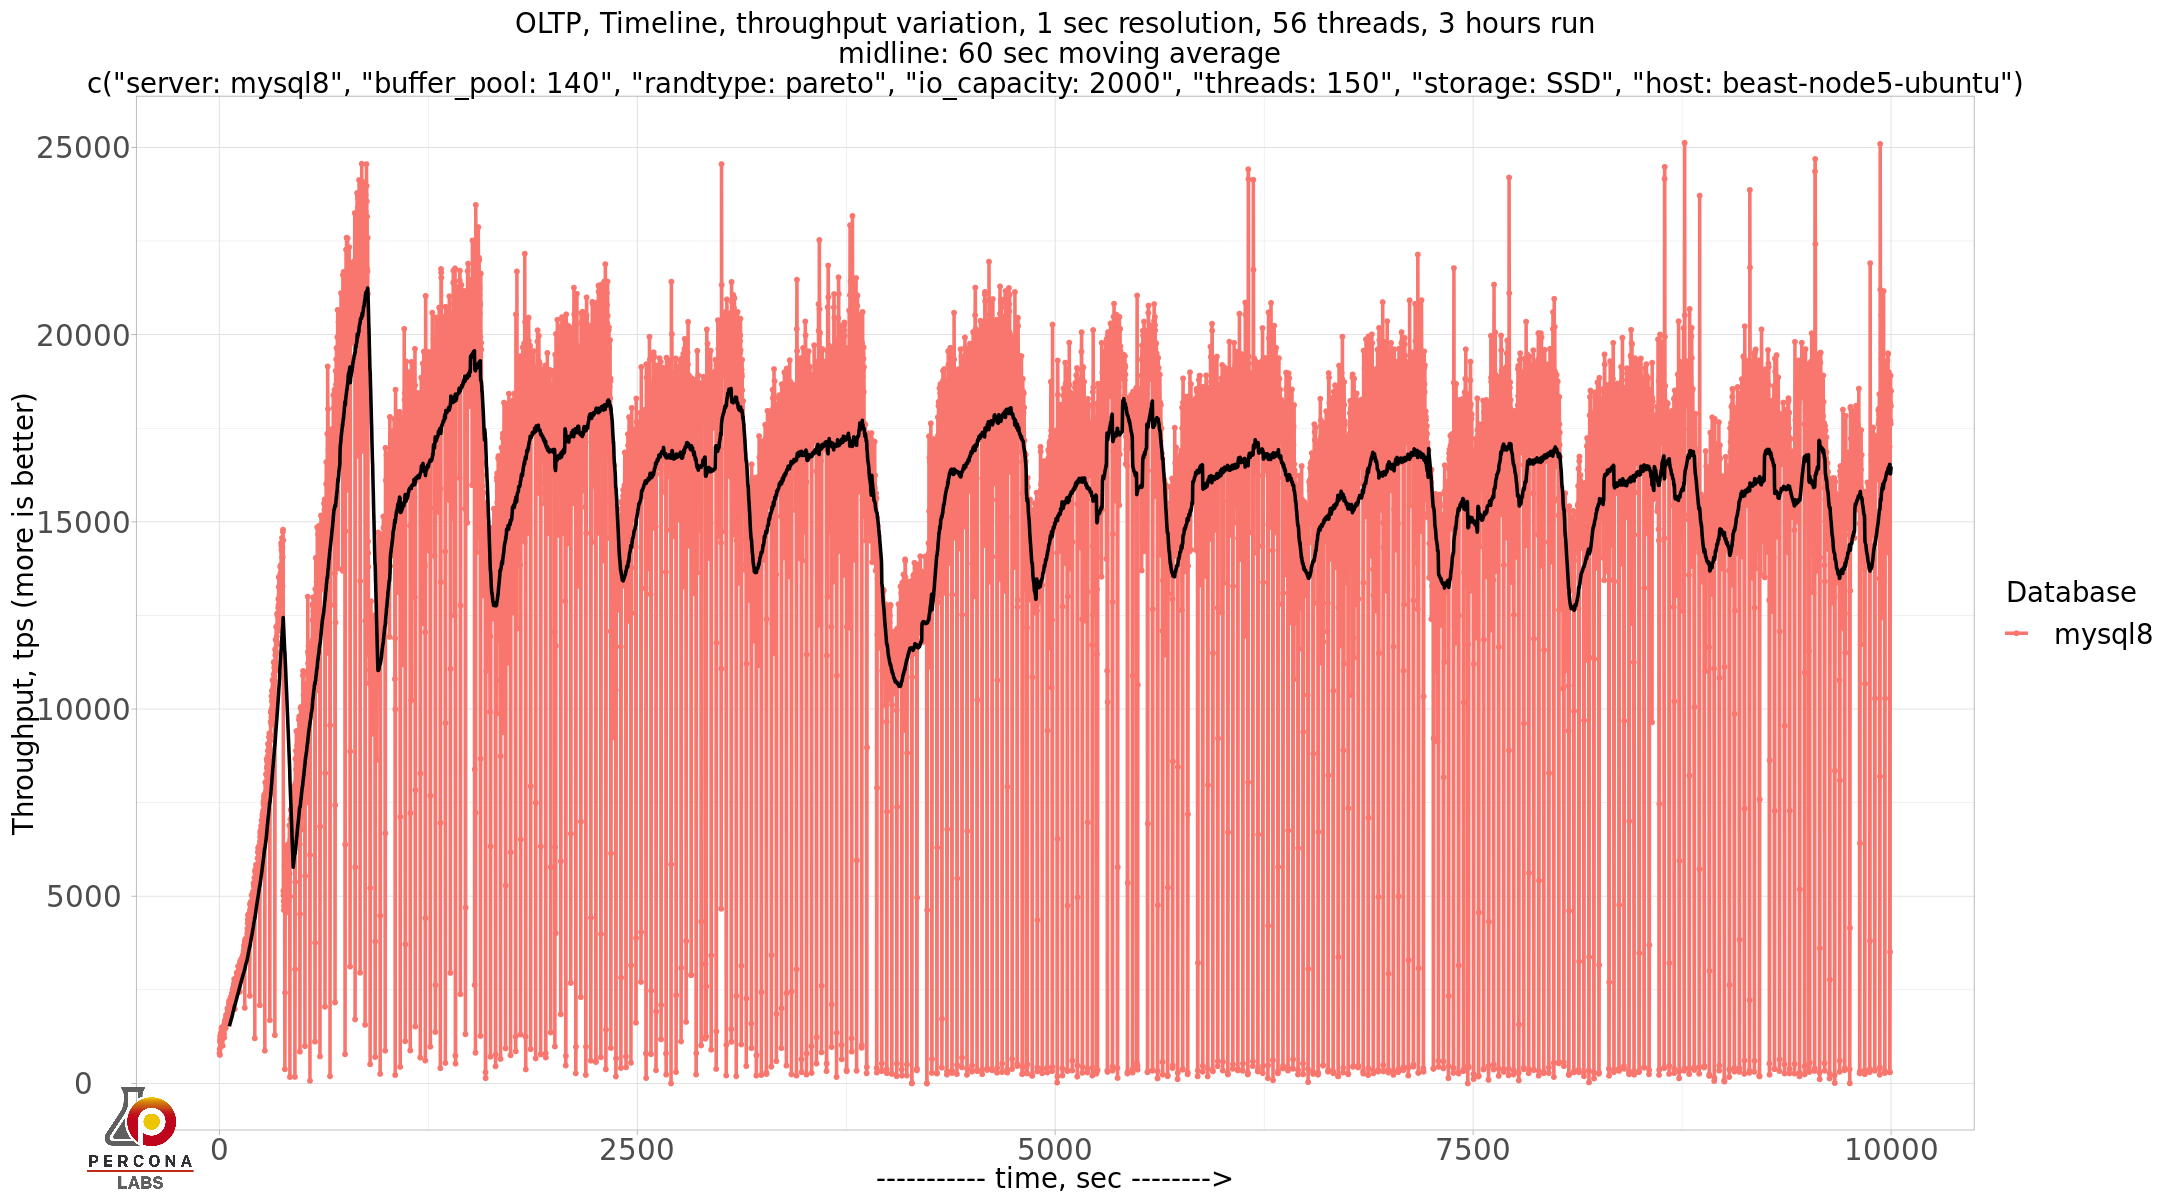

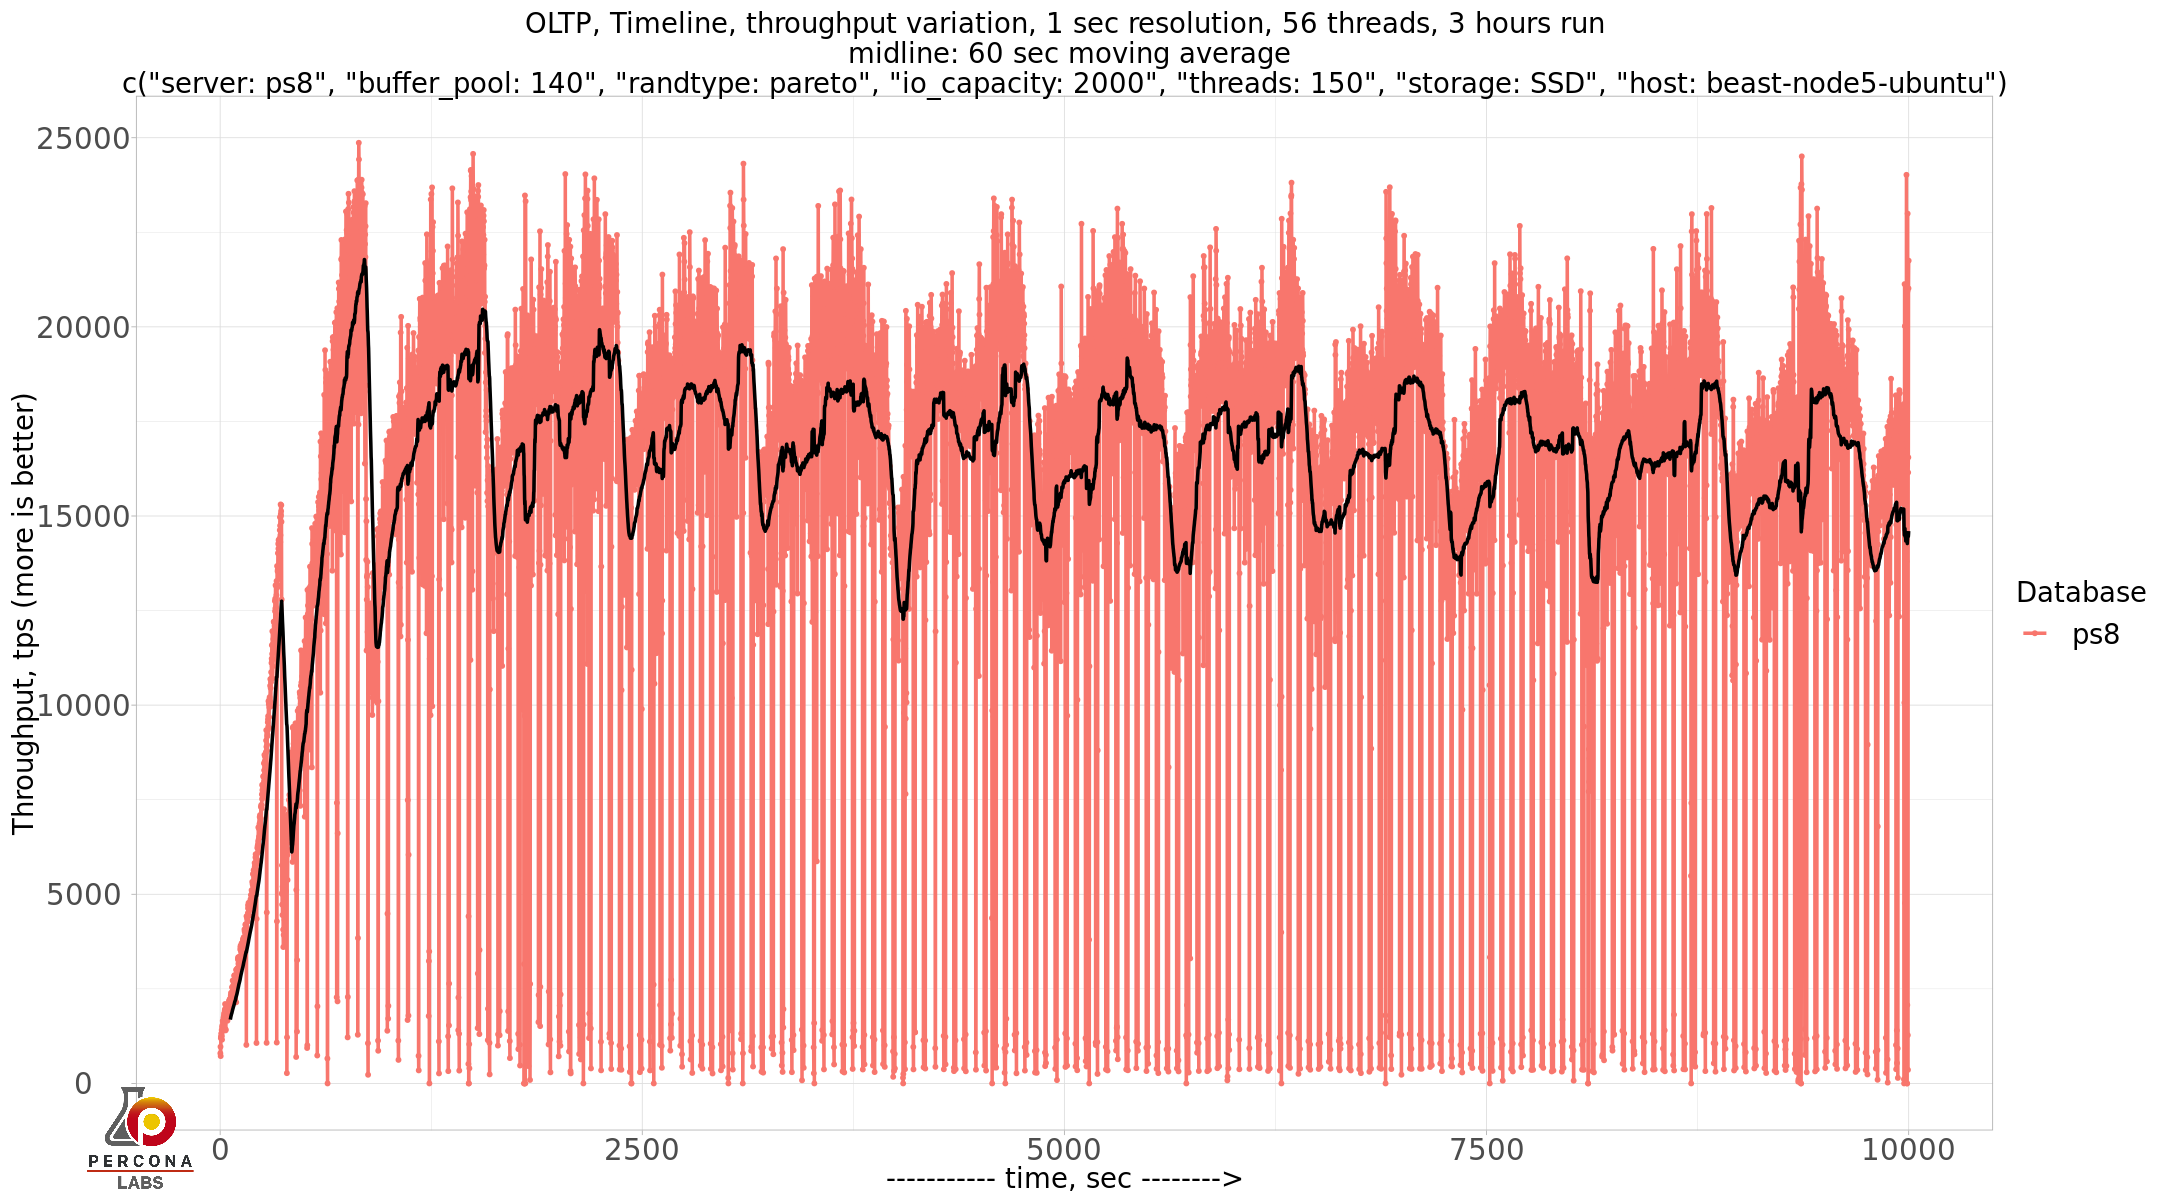

In [222]:
indexfiles<-getURL('https://raw.githubusercontent.com/Percona-Lab-results/2020-08-OLTP-rolling/master/index.txt')
        
dl<-strsplit(indexfiles, split='\n')

res = data.frame()

for (files in dl[[1]]) {
#files
#files <- dl[[1]][2]
print(files)
params<-getURL(paste0(files,'/params.txt'))
paramslines <- strsplit(params, split='\n')

data <- read.csv (text = grep("^[0-9]", strsplit(getURL(paste0(files,'/res.thr150.txt')), split='\n')[[1]], value = TRUE), header=F)

for (l in paramslines[[1]]){
    e=strsplit(l, ":")
    data[[e[[1]][1]]] = e[[1]][2]
}

#    m <- ggplot(data = subset(data), 
#            aes(x=V1, y=V3,color=as.factor(server)))

options(repr.plot.width=18, repr.plot.height=10)

#geom_line(size=1)+geom_point(size=1)+
#geom_line(aes(y=rollmean(V3, 60, na.pad=TRUE,color="black"))) +
p<-(ggplot(data = subset(data),  aes(x=V1, y=V3,color=as.factor(server))) + geom_line(size=1)+geom_point(size=1)+ 
    geom_ma(ma_fun = SMA, n = 60,linetype=1,size=1,color="black",aes(group=server)) +
    ylab("Throughput, tps (more is better)")+
    xlab("----------- time, sec -------->")+
    labs(title=paste0("OLTP, Timeline, throughput variation, 1 sec resolution, 56 threads, 3 hours run\n midline: 60 sec moving average\n",paramslines))+    
    expand_limits(y=0)+
    scale_colour_discrete(name="Database") )
   
print(ggdraw(p) + draw_image(img, x = 0, y = 0, hjust = 0, vjust = 0.25, width = 0.13, height = 0.2))
    #print(chart)
#if(nrow(res)<1){
#    res<-data
#}else{
#    res<-rbind(data,res)
#}

}

In [93]:
dmysql<-loadf('https://raw.githubusercontent.com/Percona-Lab-results/2020-07-MySQL-MariaDB-OLTP/master/res-mysql-oltp-2020-07-31-10-31/io15000.BP25/res.thr150.txt')
dmariadb<-loadf('https://raw.githubusercontent.com/Percona-Lab-results/2020-07-MySQL-MariaDB-OLTP/master/res-mysql-oltp-2020-07-31-16-24/io15000.BP25/res.thr150.txt')
#dps<-loadf('https://raw.githubusercontent.com/Percona-Lab-results/2020-07-MySQL-MariaDB-tpcc/master/res-tpcc-8.0.21-2020-07-23-14-31/ps8-BP140.NVMe.io15000/res.thr56txt')
#res-mysql-oltp-2020-07-31-16-24/io15000.BP25

In [94]:
dmysql$ver="MySQL"
dmariadb$ver="MariaDB"
dps$ver="PerconaServer"

#results<-rbind(dmysql,dmariadb,dps)
results<-rbind(dmysql,dmariadb)


In [48]:
r1 <- loadd()
#r2 <- loadd("GR8","5")
#r3 <- loadd("PXC8","3")
#r4 <- loadd("PXC8","5")
#results<-rbind(r1,r2,r3,r4)
results<-r1

ERROR: Error in loadd(): could not find function "loadd"


In [213]:
theme_set(theme_light())
theme_replace(axis.text.x=element_text(size = rel(2)))
theme_replace(axis.text.y=element_text(size = rel(2)))
theme_replace(axis.title.x=element_text(size = rel(1.5)))
theme_replace(axis.title.y=element_text(size = rel(1.5), angle = 90))
theme_replace(legend.title=element_text(size = rel(1.5)))
theme_replace(legend.text=element_text(size = rel(1.5)))
theme_replace(plot.title=element_text(size = rel(1.5)))
theme_replace(strip.text.x=element_text(size = rel(2)))
theme_replace(strip.text.y=element_text(size = rel(2)))



## Results - NVMe Storage, 25GB Buffer pool
Let’s review the results I’ve got.

### Results combined

In [211]:
#img <- png::readPNG("/home/vadim/notebooks/Percona-Labs-Logo-01.png")
#rast <- grid::rasterGrob(img, interpolate = T)
library(cowplot)
logo_file <- system.file("extdata", "/home/vadim/notebooks/Percona-Labs-Logo-01.png", package = "cowplot")
#logo_file
img<-magick::image_read("/home/vadim/notebooks/Percona-Labs-Logo-02.png")
#ggdraw(p) + 
#  draw_image(logo_file, x = 1, y = 1, hjust = 1, vjust = 1, width = 0.13, height = 0.2)

# Configs



## MySQL Config
https://github.com/Percona-Lab-results/2020-07-MySQL-MariaDB/blob/master/BP140/mysql/my8.cnf

## MariaDB Config
https://github.com/Percona-Lab-results/2020-07-MySQL-MariaDB/blob/master/BP140/mariadb/mariadb.cnf